# import dataset

# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # For machine learning approach we use sklearn package
import statsmodels.api as sm # For econometrics approach we use statsmodels package

sns.set()  #if you want to use seaborn themes with matplotlib functions

In [5]:
rand_state = 1000

In [6]:
df = pd.read_csv('insurance.csv')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.info()

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

# Data preprocessing

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [16]:
df=pd.get_dummies(df,drop_first=True)

In [17]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_male,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_yes,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region_northwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000
region_southeast,1338.0,0.272048,0.445181,0.0000,0.00000,0.000,1.000000,1.00000
region_southwest,1338.0,0.242900,0.428995,0.0000,0.00000,0.000,0.000000,1.00000


# Data visualization


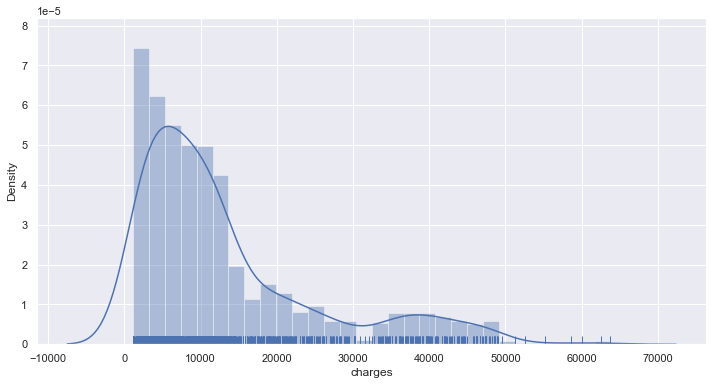

In [21]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.distplot(df['charges'], rug=True)
plt.show()


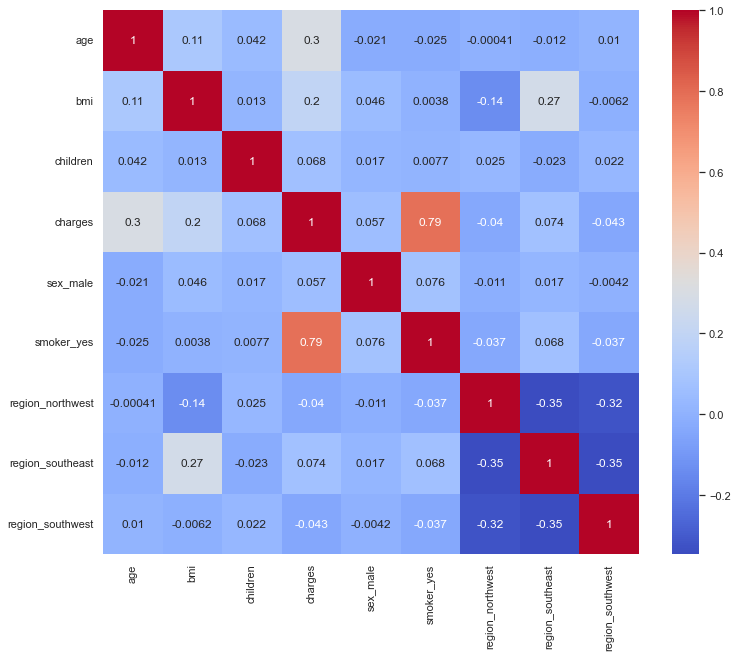

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

# Train and Test set Split


In [28]:
y=df['charges']
X=df.drop('charges', axis=1)  #inplace=False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)
# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.7

In [29]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
204,46,22.300,0,1,0,0,0,1
1264,49,33.345,2,0,0,0,0,0
313,49,35.860,0,1,0,0,1,0
1283,18,30.030,1,1,0,0,1,0
321,26,29.640,4,0,0,0,0,0


# Linear Regression with Scikit-Learn


In [30]:
reg_model =  LinearRegression()

In [31]:
reg_model.fit(X_train, y_train)

LinearRegression()

# Predictions

In [32]:
y_hat = reg_model.predict(X_test)

In [33]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
132,11163.56800,13605.292414,-2441.724414
51,3579.82870,5543.976255,-1964.147555
42,6272.47720,5490.008405,782.468795
569,45702.02235,37713.906279,7988.116071
470,2497.03830,4822.688567,-2325.650267


# Coefficients



In [34]:
reg_model.coef_

array([  252.80646825,   299.71267201,   391.90028143,  -256.25306699,
       23521.90106851,  -113.686827  , -1024.03552983,  -822.52541748])

In [36]:
reg_model.intercept_

-10514.410473905547

create a new data frame with the names of the features

In [37]:
reg_summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,age,252.8065
1,bmi,299.7127
2,children,391.9003
3,sex_male,-256.2531
4,smoker_yes,23521.9011
5,region_northwest,-113.6868
6,region_southeast,-1024.0355
7,region_southwest,-822.5254


# Evalution metrics

# R-squared

In [38]:
#The train set R-squared of the regression
reg_model.score(X_train, y_train)

0.7362514073650333

In [39]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_test, y_test),3))

Training data R-squared: 0.736
Test data R-squared: 0.778


# Adjusted R-squared


In [41]:
X_train.shape

(936, 8)

In [42]:
def adj_R2(X,y): 
    R2 = reg_model.score(X,y)
    n  = X.shape[0]
    k  = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [43]:
adj_R2(X_train,y_train)

0.734

In [44]:
adj_R2(X_test,y_test)

0.773

# MSE and RMSE

In [47]:
df_predictions.head()

,actuals,predictions,resid
132,11163.56800,13605.292414,-2441.724414
51,3579.82870,5543.976255,-1964.147555
42,6272.47720,5490.008405,782.468795
569,45702.02235,37713.906279,7988.116071
470,2497.03830,4822.688567,-2325.650267


In [48]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

35670540.658

In [49]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5972.482

# KNN Regression with Sklearn


In [50]:
from sklearn.neighbors import KNeighborsRegressor


In [51]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test)

In [53]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
132,11163.56800,21394.843524
51,3579.82870,7372.140334
42,6272.47720,16668.417360
569,45702.02235,16023.322760
470,2497.03830,9547.481108


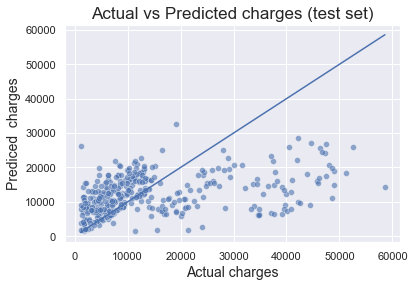

In [54]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Prediced  charges', fontsize=14)
plt.title('Actual vs Predicted charges (test set)', fontsize=17)
plt.show()

In [55]:
KNN_regression.score(X_test, y_test)

0.16183806999549333

# Performance metrics:

In [56]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

134561442.83

In [57]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

11600.06